# **Defining the problem**

Diabetes is defined as the body's inability to use blood sugar properly.While diabetes threatens people of all age groups, one person dies every six seconds in the world due to diabetes-related problems.Studies show that the number of people who will have diabetes in 2035 will approach 600 million worldwide.Early diagnosis of diabetes affects the quality of life of the person positively and reduces the risk of developing other diseases.Because when diabetes is not controlled, it can damage all organs of the body. For example; heart failure, kidney disease, nerve damage, stroke, etc.

# **Definition of data set**

The data set studied was obtained through Kaggle, a data science community. Dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient.This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor.

#### **Features of the dataset**

The dataset consist of total 15 features and one target variable named class.

1. Age: Age in years ranging from (20years to 65 years)
2. Gender: Male / Female
3. Polyuria: Yes / No
4. Polydipsia: Yes/ No
5. Sudden weight loss: Yes/ No
6. Weakness: Yes/ No
7. Polyphagia: Yes/ No
8. Genital Thrush: Yes/ No
9. Visual blurring: Yes/ No
10. Itching: Yes/ No
11. Irritability: Yes/No
12. Delayed healing: Yes/ No
13. Partial Paresis: Yes/ No
14. Muscle stiffness: yes/ No
15. Alopecia: Yes/ No
16. Obesity: Yes/ No

Class: Positive / Negative

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

df = pd.read_csv('diabetes_data_upload.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [2]:
# Change column names: replacing spaces with underscores
df.rename(columns={'sudden weight loss': 'sudden_weight_loss', 'Genital thrush': 'Genital_thrush', 
                         'visual blurring': 'visual_blurring', 'delayed healing': 'delayed_healing', 
                         'partial paresis': 'partial_paresis', 'muscle stiffness': 'muscle_stiffness'}, inplace=True)

# making capitalizing the fisrt letter of each head column 
df.columns = map(lambda x: str(x).capitalize(), df.columns)

df

,Age,Gender,Polyuria,Polydipsia,Sudden_weight_loss,Weakness,Polyphagia,Genital_thrush,Visual_blurring,Itching,Irritability,Delayed_healing,Partial_paresis,Muscle_stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
# i need to split the data twice 
from sklearn.model_selection import  train_test_split
train_validate, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df['Class'], random_state=42)

train_validate.shape, test.shape

((416, 17), (104, 17))

In [4]:

# second split
train, validate = train_test_split(train_validate, train_size=0.80, test_size=0.20, 
                              stratify=train_validate['Class'], random_state=42)

train.shape, validate.shape

((332, 17), (84, 17))

In [5]:
target = 'Class'
y_train = train[target]
y_train.value_counts(normalize=True)

Positive    0.614458
Negative    0.385542
Name: Class, dtype: float64

In [21]:
!pip install --upgrade matplotlib pandas

Requirement already up-to-date: matplotlib in c:\users\user\anaconda3\lib\site-packages (3.4.0)
Requirement already up-to-date: pandas in c:\users\user\anaconda3\lib\site-packages (1.2.3)


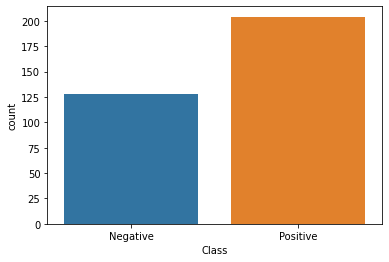

In [6]:
#visualizing the target

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(y_train);

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Distribution of Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

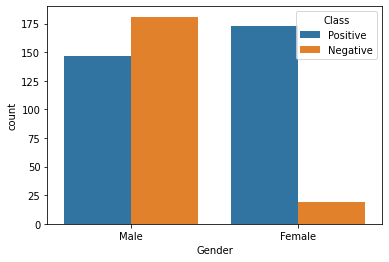

In [8]:

sns.countplot(df['Gender'],hue=df['Class'], data=df)


## Distribution of Polyuria

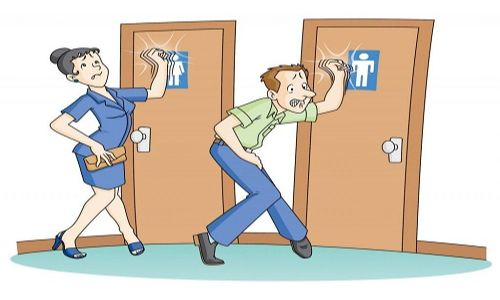

In [9]:
Image(filename='polyuria.jpg')

<AxesSubplot:xlabel='Polyuria', ylabel='count'>

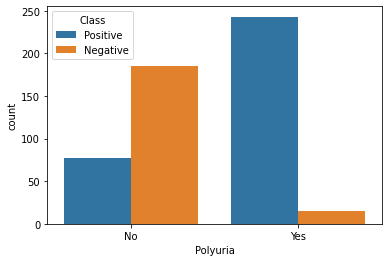

In [10]:

sns.countplot(df['Polyuria'],hue=df['Class'], data=df)



## Distribution of Polydipsia

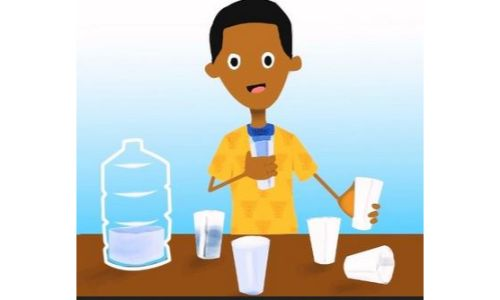

In [11]:
Image(filename='polydipsia.jpg')

<AxesSubplot:xlabel='Polydipsia', ylabel='count'>

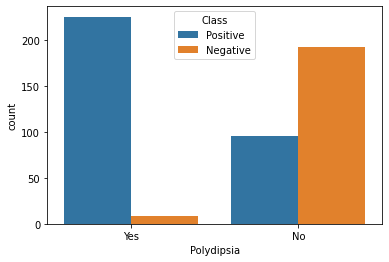

In [12]:

sns.countplot(df['Polydipsia'],hue=df['Class'], data=df)




## Distribution of sudden weight loss

<AxesSubplot:xlabel='Sudden_weight_loss', ylabel='count'>

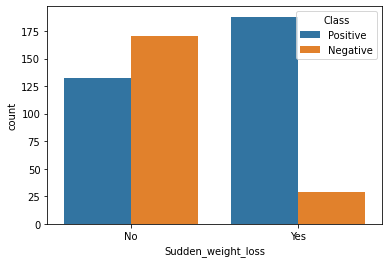

In [13]:

sns.countplot(df['Sudden_weight_loss'],hue=df['Class'], data=df)


## Distribution of weakness

<AxesSubplot:xlabel='Weakness', ylabel='count'>

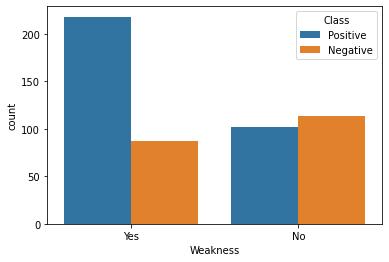

In [14]:

sns.countplot(df['Weakness'],hue=df['Class'], data=df)


## Distribution of Polyphagia

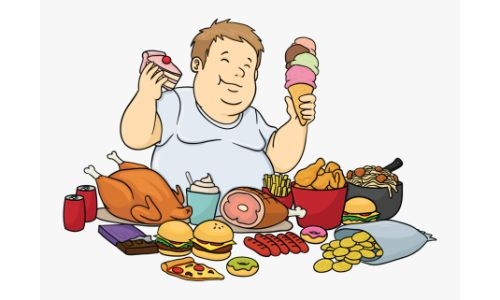

In [15]:
Image(filename='polyphagia.jpg')

<AxesSubplot:xlabel='Polyphagia', ylabel='count'>

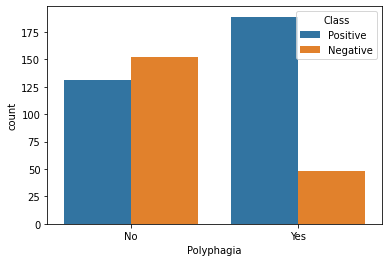

In [16]:

sns.countplot(df['Polyphagia'],hue=df['Class'], data=df)


## Distribution of Genital thrush

<AxesSubplot:xlabel='Genital_thrush', ylabel='count'>

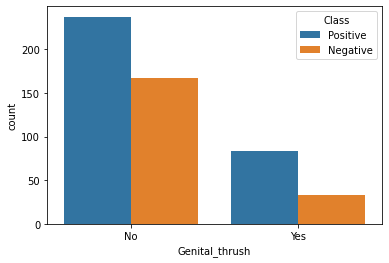

In [17]:

sns.countplot(df['Genital_thrush'],hue=df['Class'], data=df)


## Distribution of visual blurring

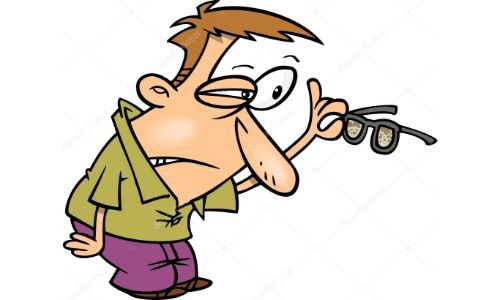

In [18]:
Image(filename='Distribution of Visual Blurring.jpg')

<AxesSubplot:xlabel='Visual_blurring', ylabel='count'>

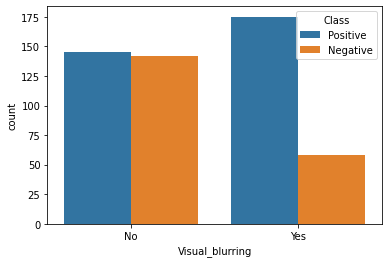

In [19]:

sns.countplot(df['Visual_blurring'],hue=df['Class'], data=df)


## Distribution of Itching

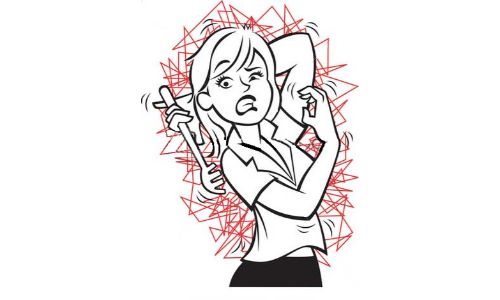

In [20]:
Image(filename='Itching.jpg')

<AxesSubplot:xlabel='Itching', ylabel='count'>

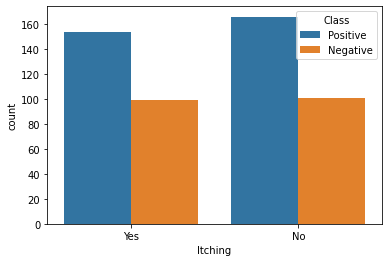

In [21]:

sns.countplot(df['Itching'],hue=df['Class'], data=df)


## Distribution of Irritability

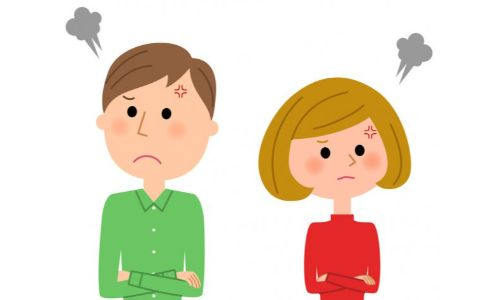

In [22]:
Image(filename='Irritability.jpg')

<AxesSubplot:xlabel='Irritability', ylabel='count'>

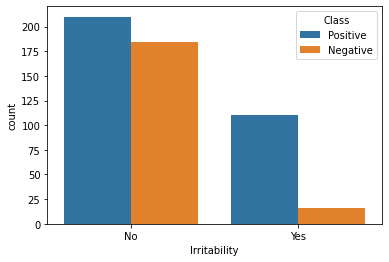

In [23]:

sns.countplot(df['Irritability'],hue=df['Class'], data=df)


## Distribution of delayed healing

<AxesSubplot:xlabel='Delayed_healing', ylabel='count'>

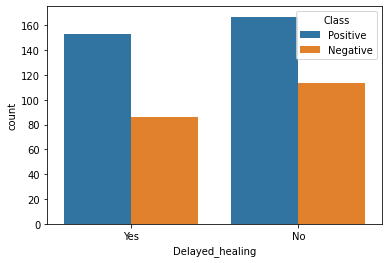

In [24]:

sns.countplot(df['Delayed_healing'],hue=df['Class'], data=df)


## Distribution of partial paresis

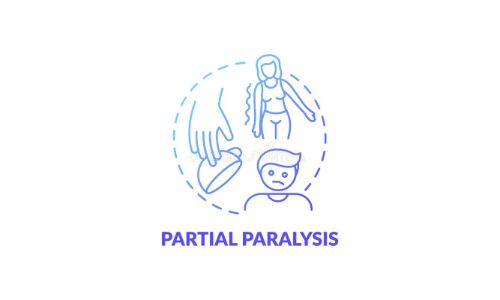

In [25]:
Image(filename='partial paresis.jpg')

<AxesSubplot:xlabel='Partial_paresis', ylabel='count'>

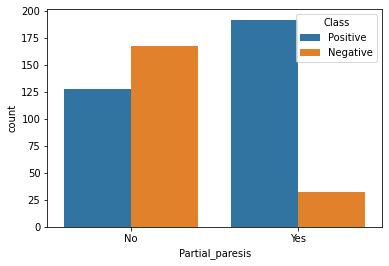

In [26]:

sns.countplot(df['Partial_paresis'],hue=df['Class'], data=df)

## Distribution of muscle stiffness

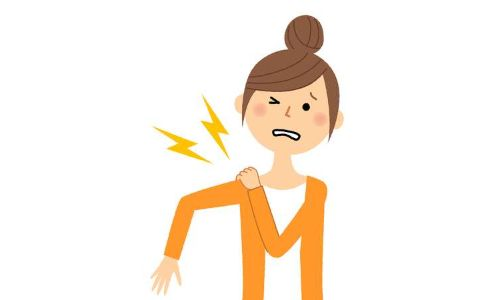

In [27]:
Image(filename='Muscle Stiffness.jpg')

<AxesSubplot:xlabel='Muscle_stiffness', ylabel='count'>

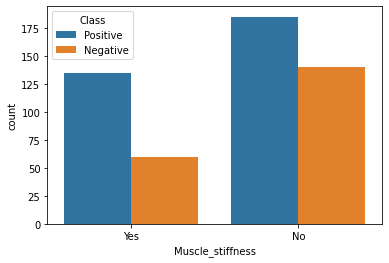

In [28]:

sns.countplot(df['Muscle_stiffness'],hue=df['Class'], data=df)


## Distribution of Alopecia

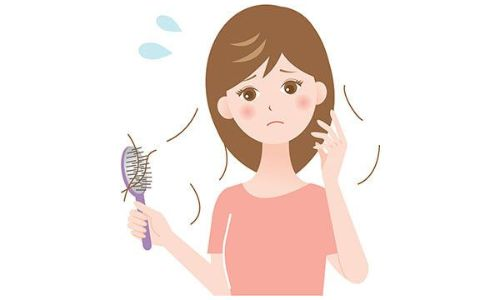

In [29]:
Image(filename='Alopecia.jpg')

<AxesSubplot:xlabel='Alopecia', ylabel='count'>

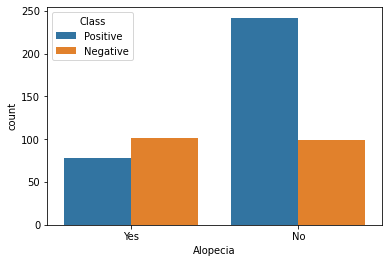

In [30]:

sns.countplot(df['Alopecia'],hue=df['Class'], data=df)


## Distribution of Obesity

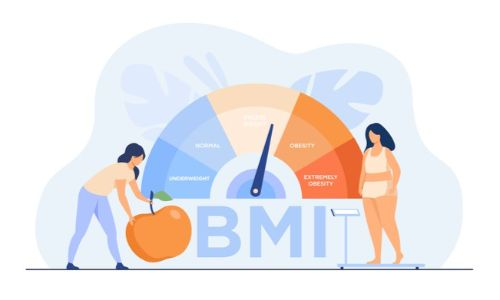

In [31]:
Image(filename='Obesity.jpg')

<AxesSubplot:xlabel='Obesity', ylabel='count'>

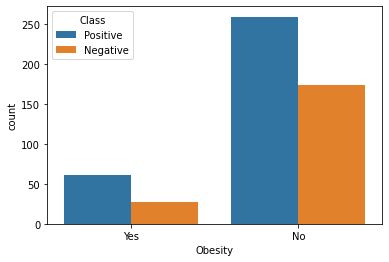

In [32]:

sns.countplot(df['Obesity'],hue=df['Class'], data=df)


## checking the majority


In [33]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
y_pred

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',

In [34]:
from sklearn.metrics import accuracy_score

y_validate = validate[target]
y_pred = [majority_class] * len(y_validate)
accuracy_score(y_validate, y_pred)


0.6190476190476191

## Logistic Regression

In [35]:
# Using the target i choosed
target = 'Class'

# Get a dataframe with all train columns except the target
features = train.columns.drop([target])


# vectors and matrices
X_train = train[features]
y_train = train[target]
X_validate = validate[features]
y_validate = validate[target]
X_test = test[features]
y_test = test[target]

In [36]:
# making pipeline and fitting the data
import category_encoders as ce 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    LogisticRegression(random_state=100, max_iter=50) # more iterations higher accuracy
  )

# Fitting on train
pipeline.fit(X_train, y_train)

#prediction on X_test
y_pred1 = pipeline.predict(X_test)

#predict probabilities for the test set.
y_pred_proba1 = pipeline.predict_proba(X_test)[:, -1]

# accuracy is kinda the times the guest try 
#score on validate
print('Validation Accuracy', pipeline.score(X_validate, y_validate))
print('Test ROC AUC score', roc_auc_score(y_test, y_pred_proba1))

Validation Accuracy 0.9166666666666666
Test ROC AUC score 0.9839843749999999


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion Matrix Plot 

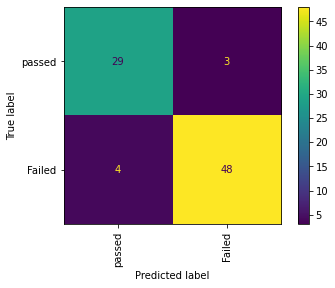

In [37]:

from sklearn.metrics import plot_confusion_matrix

Classes = ['passed', 'Failed']
plot_confusion_matrix(pipeline, X_validate,
                      y_validate, values_format='.0f', 
                      xticks_rotation='vertical', 
                      display_labels=Classes);

## Classification Report

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    Negative       0.91      0.97      0.94        40
    Positive       0.98      0.94      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



## Permutation importance with logistic regression

In [39]:
# permutation importances
import eli5
from eli5.sklearn import PermutationImportance

# encoder and imputer pipeline
imputer = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

# using the pipeline 
X_train_imputer = imputer.fit_transform(X_train)
X_test_imputer = imputer.fit_transform(X_test)

# using the model ad fitting data
model = LogisticRegression(random_state=100, max_iter=50) # more iterations higher accuracy
model.fit(X_train_imputer, y_train)

# applying or setting up the permution  
permuter = PermutationImportance(
    model, #What is the model?
    scoring = 'accuracy', #What scoring parameter do you want to use?
    n_iter=5, #How many of random shuffles?
    random_state=42  
)

# using the permutation
permuter.fit(X_train_imputer, y_train) 
feature_names = X_validate.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# using eli5 to show the permutation work
eli5.show_weights(
    permuter, 
    top=None, # No limit: show permutation importances for all features
    feature_names=feature_names # must be a list
)

C:\Users\USER\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Weight,Feature
0.1428 ± 0.0246,Polyuria
0.1211 ± 0.0350,Gender
0.1084 ± 0.0241,Polydipsia
0.0476 ± 0.0089,Irritability
0.0398 ± 0.0192,Itching
0.0187 ± 0.0134,Visual_blurring
0.0163 ± 0.0090,Muscle_stiffness
0.0096 ± 0.0045,Genital_thrush
0.0084 ± 0.0080,Alopecia
0.0054 ± 0.0059,Age


## Decision Tree

In [40]:

#creating the pipeline with the libraries below
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipeline1 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(criterion='gini',
                             max_depth = 10,
                             max_features = 'auto',
                             random_state = 1,
                             splitter = 'best'))

# Fit on train
pipeline1.fit(X_train, y_train)

# Predict on test
y_pred2 = pipeline1.predict(X_test)

#predict probabilities for the test set.
y_pred_proba2 = pipeline1.predict_proba(X_test)[:, -1]

# accuracy is kinda the times the guest try 
print('Validation Accuracy', pipeline1.score(X_validate, y_validate))
print('Test ROC AUC score', roc_auc_score(y_test, y_pred_proba2))

C:\Users\USER\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Validation Accuracy 0.9761904761904762
Test ROC AUC score 0.9718749999999999


## Confusion Matrix Plot 

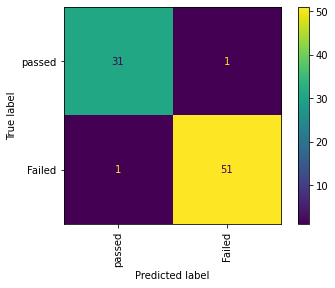

In [41]:

from sklearn.metrics import plot_confusion_matrix

Classes = ['passed', 'Failed']
plot_confusion_matrix(pipeline1, X_validate, y_validate, 
                      values_format='.0f', xticks_rotation='vertical',
                      display_labels=Classes);

## Classification report 

In [42]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96        40
    Positive       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



## Visualizing the Desicion Tree Model

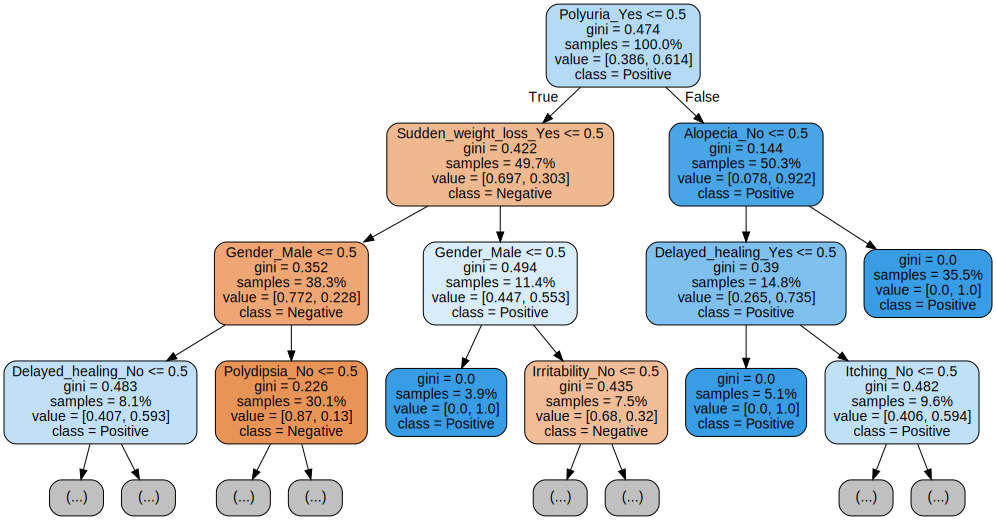

In [43]:

import graphviz
from sklearn.tree import export_graphviz

model = pipeline1.named_steps['decisiontreeclassifier']
encoder = pipeline1.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_validate).columns

tree = export_graphviz(model, out_file=None, max_depth=3, feature_names=encoded_columns,
                       class_names=model.classes_,  impurity=True, filled=True, 
                       proportion=True,  rounded=True) 
  
display(graphviz.Source(tree))

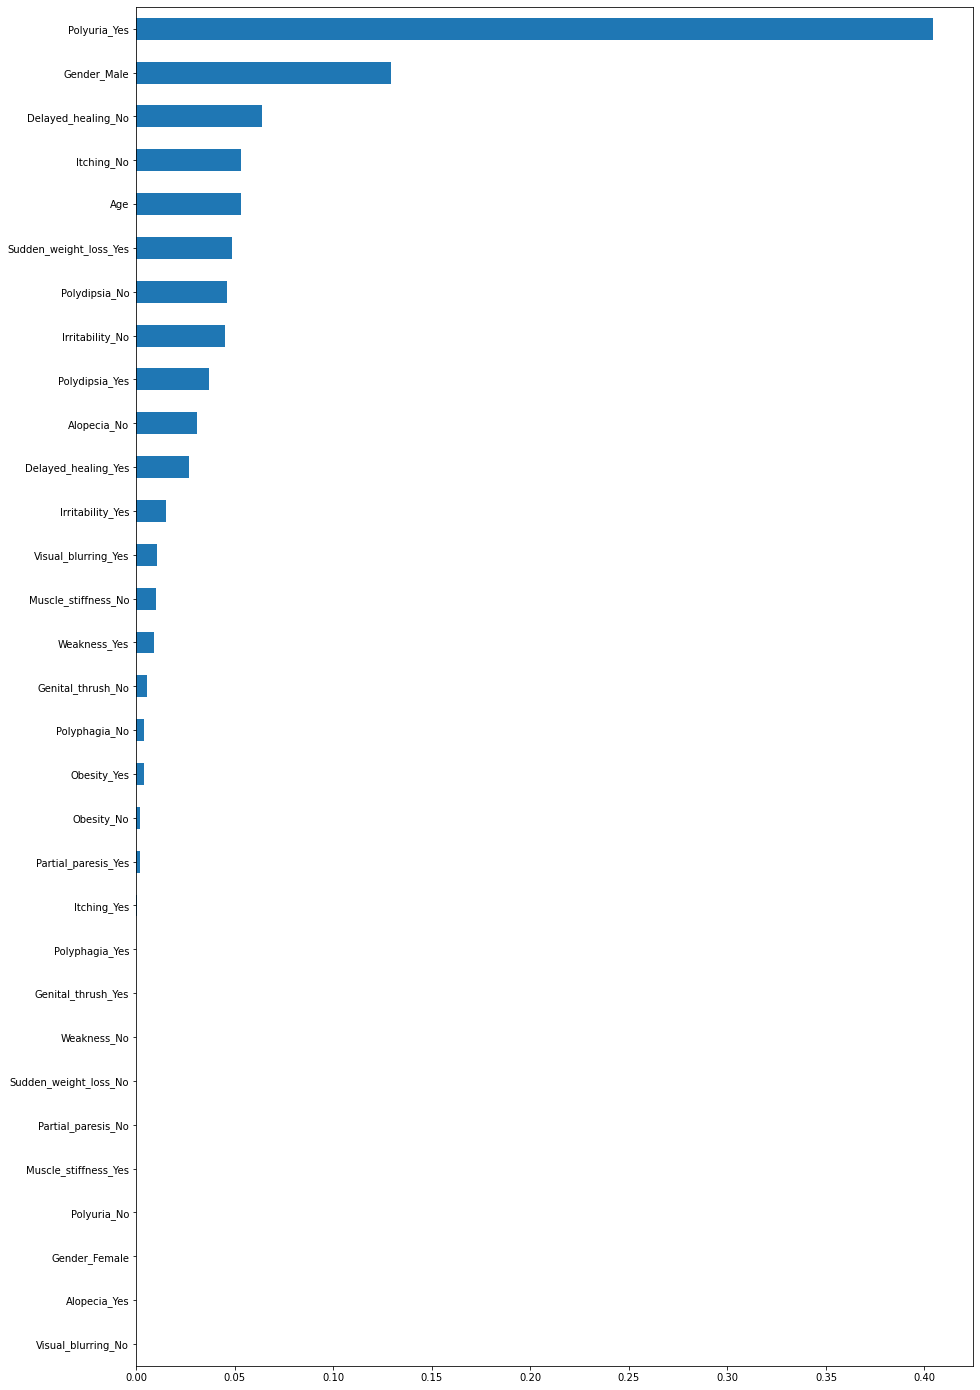

In [44]:

# visualyzing the feature importances
encoder_columns = pipeline1.named_steps['onehotencoder']

encoded_columns = encoder_columns.transform(X_validate).columns

importances = pd.Series(model.feature_importances_, encoded_columns)

plt.figure(figsize=(15,25))

importances.sort_values().plot.barh();

## Random Forest Model

In [45]:
# trying ordinal encoding, imputing data and apply random forest 
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline3 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=50, n_jobs=-1)
  )

# Fitting on train, score on validate
pipeline3.fit(X_train, y_train)

#prediction on X_test
y_pred3 = pipeline3.predict(X_test)

#predict probabilities for the test set.
y_pred_proba3 = pipeline3.predict_proba(X_test)[:, -1]

# accuracy is kinda the times the guest try 
print('Validation Accuracy', pipeline3.score(X_validate, y_validate))
print('Test ROC AUC score', roc_auc_score(y_test, y_pred_proba3))

Validation Accuracy 0.9642857142857143
Test ROC AUC score 0.999609375


## Confusion Matrix 

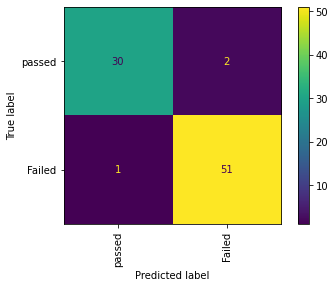

In [46]:

from sklearn.metrics import plot_confusion_matrix

Classes = ['passed', 'Failed']
plot_confusion_matrix(pipeline3, X_validate, y_validate, 
                      values_format='.0f', xticks_rotation='vertical',
                      display_labels=Classes);

In [47]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

    Negative       0.95      1.00      0.98        40
    Positive       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



## Partial Dependence Plot, 1 feature isolation

In [48]:

# in this case i need to avoid the pipeline the reason why is because
# it will give me error below when i try to set up the pdp_isolate
# i need to enconder first
encoder = ce.OrdinalEncoder()
X_validate_encoder = encoder.fit_transform(X_validate)

# i need to imputer separate because the missing values 
impute = SimpleImputer()
X_validate_inpute2 = impute.fit_transform(X_validate_encoder)

# using model and fitting the data
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_validate_inpute2, y_validate)

# pulling the features in a variable
features1 = X_validate.columns
features1

# making a dataframe because when you impute lost your features name 
# so i did apply the columns names like a difined above so i can avoid the error below 
# the one saying features name not found
X_validate_inpute2 = pd.DataFrame(X_validate_inpute2, columns=features1)
X_validate_inpute2

,Age,Gender,Polyuria,Polydipsia,Sudden_weight_loss,Weakness,Polyphagia,Genital_thrush,Visual_blurring,Itching,Irritability,Delayed_healing,Partial_paresis,Muscle_stiffness,Alopecia,Obesity
0,55.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,54.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
2,58.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0
3,57.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
4,54.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,34.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
80,39.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0
81,49.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0
82,30.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0


In [49]:
X_validate_inpute2['Gender'].value_counts(normalize=True)

2.0    0.666667
1.0    0.333333
Name: Gender, dtype: float64

In [50]:
conda install -c conda-forge pdpbox

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


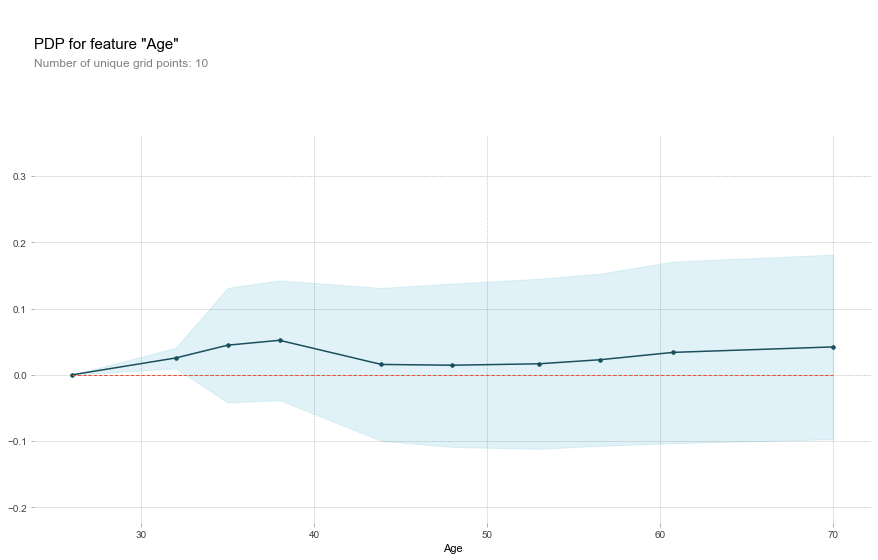

In [51]:
# using pdp_plot to vizualy the feature i want to show
# but first i need to setting up the isolated
from pdpbox.pdp import pdp_isolate, pdp_plot
 
feature = 'Age' #define feature for plot 


isolated = pdp_isolate(
    model=model, #specify model
    dataset=X_validate_inpute2, #specify dataset
    model_features=features1, #specify all the features
    feature=feature #input any feature
    
)

# plotting 
pdp_plot(isolated, feature_name=feature);


## Partial Dependence Plot, 2 features interaction

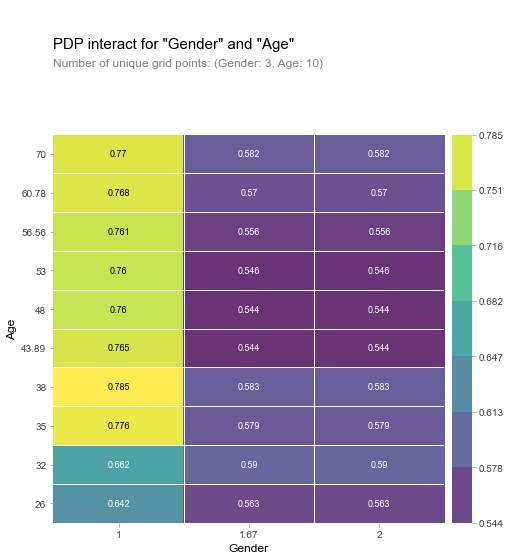

In [52]:
# using the same dataframe like above but making PDP with 2 features
# using the interact library and setting up too
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features2 = ['Gender', 'Age'] #define feature for plot 


interaction = pdp_interact(
    model=model, #specify model
    dataset=X_validate_inpute2, #specify dataset
    model_features=features1, #specify all the features
    features=features2
)

# i see the 2019 riskier than years before
pdp_interact_plot(interaction, plot_type='grid', feature_names=features2);

## XGBoost Classifier Model

In [53]:

# in this case i decide to use other model desicion tree
# making a pipeline, taking the eval_set , using the model and fitting the data
# choosing the avluation metric AUC
# in this case i decide to use other model XGBoost
# making a pipeline, taking the eval_set , using the model and fitting the data
# choosing the avluation metric AUC

from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_validate_processed = processor.transform(X_validate)

eval_set = [(X_train_processed, y_train), 
            (X_validate_processed, y_validate)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.98346	validation_1-auc:0.94081
[1]	validation_0-auc:0.98778	validation_1-auc:0.95493
[2]	validation_0-auc:0.98822	validation_1-auc:0.95613
[3]	validation_0-auc:0.98868	validation_1-auc:0.96034
[4]	validation_0-auc:0.99171	validation_1-auc:0.96094
[5]	validation_0-auc:0.99621	validation_1-auc:0.97596
[6]	validation_0-auc:0.99722	validation_1-auc:0.97536
[7]	validation_0-auc:0.99820	validation_1-auc:0.97776
[8]	validation_0-auc:0.99862	validation_1-auc:0.97416
[9]	validation_0-auc:0.99900	validation_1-auc:0.97776
[10]	validation_0-auc:0.99935	validation_1-auc:0.98077
[11]	validation_0-auc:0.99939	validation_1-auc:0.98257
[12]	validation_0-auc:0.99958	validation_1-auc:0.98197
[13]	validation_0-auc:0.99958	validation_1-auc:0.98377
[14]	validation_0-auc:0.99962	validation_1-auc:0.98438
[15]	validation_0-auc:0.99973	validation_1-auc:0.98257
[16]	validation_0-auc:0.99985	validation_1-auc:0.98498
[17]	validation_0-auc:0.99981	validation_1-auc:0.98377
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
# define a prediction function for a better visualyzation
import shap

def explain(row_number):
    positive_class = 'positive'
    positive_class_index = 1

    # Get & process the data for the row
    row = X_test.iloc[[row_number]]
    explainer = shap.TreeExplainer(model)
    row_processed = processor.transform(row)

    # Make predictions (includes predicted probability)
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # Number of Patients
    print('Records of 103 Patiens:')
    print('\n')
    # Show prediction & probability
    print(f'The model predicts this Early stage diabetes risk prediction is {pred}, with {pred_proba:.0f}% probability.')
    
    # Get shapley additive explanations
    shap_values = explainer.shap_values(row_processed)

    # Get top 3 "pros & cons" for fully paid
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=True)[:].index
    cons = shaps.sort_values(ascending=True)[:].index

    # Show top 3 reason for prediction
    print('\n')
    print('Top reasons for diabetes risk:')
    print('\n')
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} is {feature_value}.')

    # Show Shapley Values Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit' # For classification, this shows predicted probabilities
    )
# find the prediction typing any number between 0-103
explain(0)

Records of 103 Patiens:


The model predicts this Early stage diabetes risk prediction is Negative, with 98% probability.


Top reasons for diabetes risk:


1. Polydipsia is No.
2. Alopecia is Yes.
3. Polyuria is No.
4. Polyphagia is No.
5. Sudden_weight_loss is No.
6. Itching is Yes.
7. Age is 50.
8. Weakness is Yes.
9. Irritability is No.
10. Delayed_healing is Yes.
11. Genital_thrush is No.
12. Partial_paresis is No.
13. Obesity is No.
14. Muscle_stiffness is No.
15. Visual_blurring is Yes.
16. Gender is Female.
